## Versão do gráfico com tempo de 0 a 3s - abaixo o gráfico com alteração em sua escala para melhor analise
---

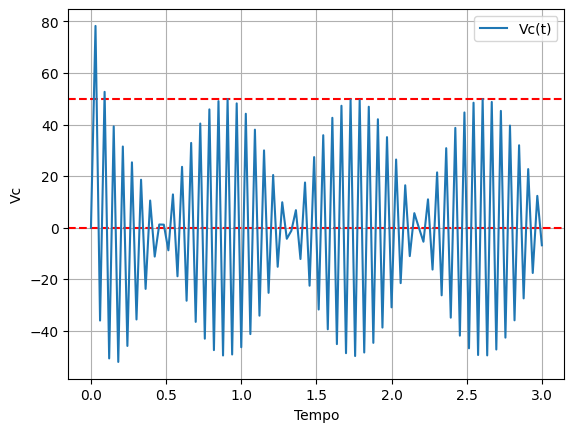

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
#definição das constantes
R = 1.6*(1000)
L = 100
C = 100*(0.000001)

#definicao da EDO
def edo(t,rlc):
  #passagem em rlc dos valores iniciais da tensao e da primeira derivada, segundo a boa prática de resolução de edo em python
  V,V1 = rlc

  #para operar a edo, definir como um sistema de duas equacoes, separar a segunda derivada
  dVdt = V1 #primeira derivada
  dVc2dt = (50*np.sin(100*t))/(L*C) - (V/(L*C)) - (R/L)*V1 #segunda derivada e isolada com fem(t) escrita de forma explicita

  return [dVdt,dVc2dt] #chama o retorno para a primeira e segunda derivadas

#definicao dos valores de V e V1
Vo = 0.0
V1o = 0.0
rlc = [Vo,V1o]

#definicao do tempo
comeco = 0.0
fim = 3.0
t_span = [comeco,fim]
t_eval = np.linspace(comeco,fim , 100) #porcoes do tempo

#chamar a funcao que resolve
solucao = solve_ivp(edo, t_span, rlc, t_eval=t_eval)

#o objeto solucao possui campos com os periodos de tempo e as solucoes para cada derivada, ja que interpreta como duas edos separadas
t = solucao.t
resultado = solucao.y[0]

plt.axhline(y=50, xmin=comeco, xmax=fim, color='red', linestyle='--')
plt.axhline(y=0, xmin=comeco, xmax=fim, color='red', linestyle='--')
plt.plot(t,solucao.y[1],label='Vc(t)')
plt.xlabel("Tempo")
plt.ylabel("Vc")
plt.legend()
plt.grid(True)
#plt.axhline(y=1,xmin=comeco,xmax=fim,  color='red', linestyle='--', label='Stationary Regime')

plt.show()

# IMAGEM DO  GRAFICO ACIMA MAS COM MUDANCA NA ESCALA
---

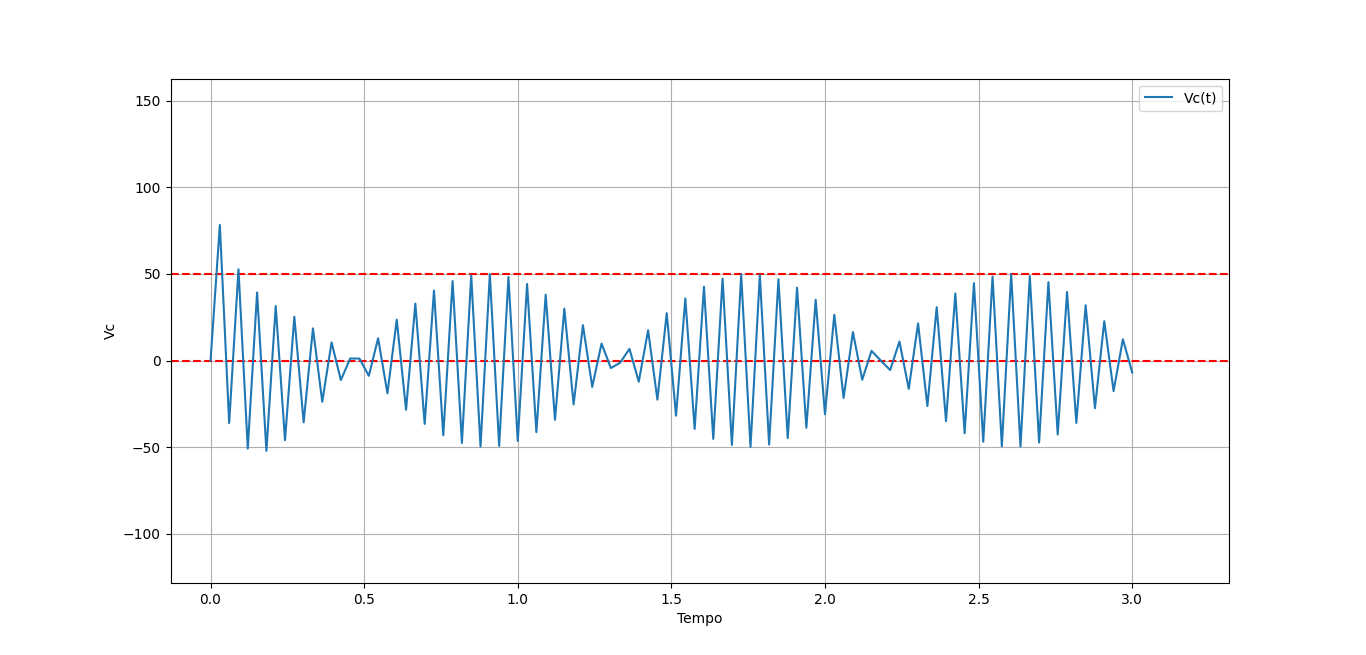

# Versao com maior tempo
## Para analise da frequencia do regime estacionario
##### Plotando gráfico no computador, a biblioteca fornece ferramentas de zoom e alteracao da escala do gráfico, o que permitiu a analise dos pontos que mais se aproximam do pontilhado vermelho. Fotos abaixo demonstrando o processo de analise dos dados.
----

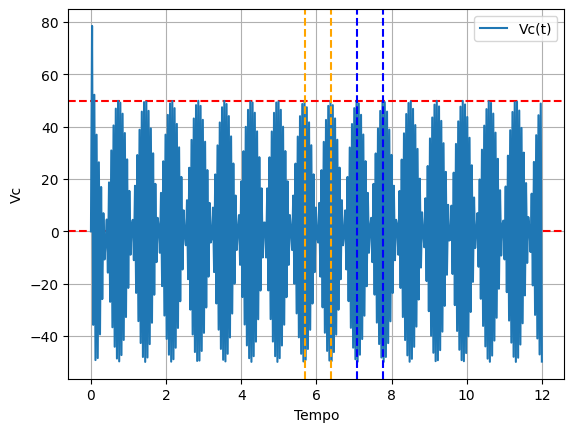

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
#definição das constantes
R = 1.6*(1000)
L = 100
C = 100*(0.000001)

#definicao da EDO
def edo(t,rlc):
  #passagem em rlc dos valores iniciais da tensao e da primeira derivada, segundo a boa prática de resolução de edo em python
  V,V1 = rlc

  #para operar a edo, definir como um sistema de duas equacoes, separar a segunda derivada
  dVdt = V1 #primeira derivada
  dVc2dt = (50*np.sin(100*t))/(L*C) - (V/(L*C)) - (R/L)*V1 #segunda derivada e isolada com fem(t) escrita de forma explicita

  return [dVdt,dVc2dt] #chama o retorno para a primeira e segunda derivadas

#definicao dos valores de V e V1
Vo = 0.0
V1o = 0.0
rlc = [Vo,V1o]

#definicao do tempo
comeco = 0.0
fim = 12.0
t_span = [comeco,fim]
t_eval = np.linspace(comeco,fim , 400) #porcoes do tempo

#chamar a funcao que resolve
solucao = solve_ivp(edo, t_span, rlc, t_eval=t_eval)

#o objeto solucao possui campos com os periodos de tempo e as solucoes para cada derivada, ja que interpreta como duas edos separadas
t = solucao.t
resultado = solucao.y[0]

#medida descoberta apos dar zoom no grafico
plt.axhline(y=49.91, xmin=comeco, xmax=fim, color='red', linestyle='--')
plt.axhline(y=0, xmin=comeco, xmax=fim, color='red', linestyle='--')

plt.plot(t,solucao.y[1],label='Vc(t)')
plt.xlabel("Tempo")
plt.ylabel("Vc")
plt.legend()
plt.grid(True)


plt.axvline(x=5.6843, color='orange', linestyle='--')
plt.axvline(x=6.3759, color='orange', linestyle='--')
plt.axvline(x=7.0675, color='blue', linestyle='--')
plt.axvline(x=7.7591, color='blue', linestyle='--')
plt.show()


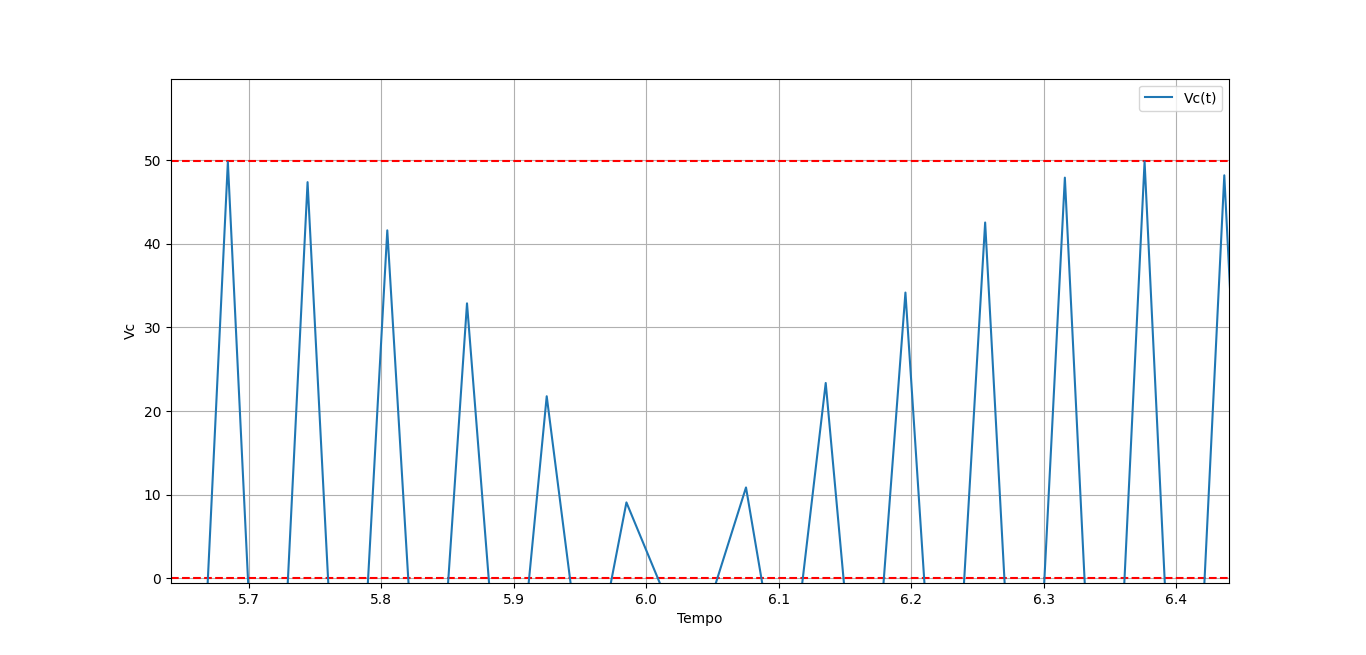

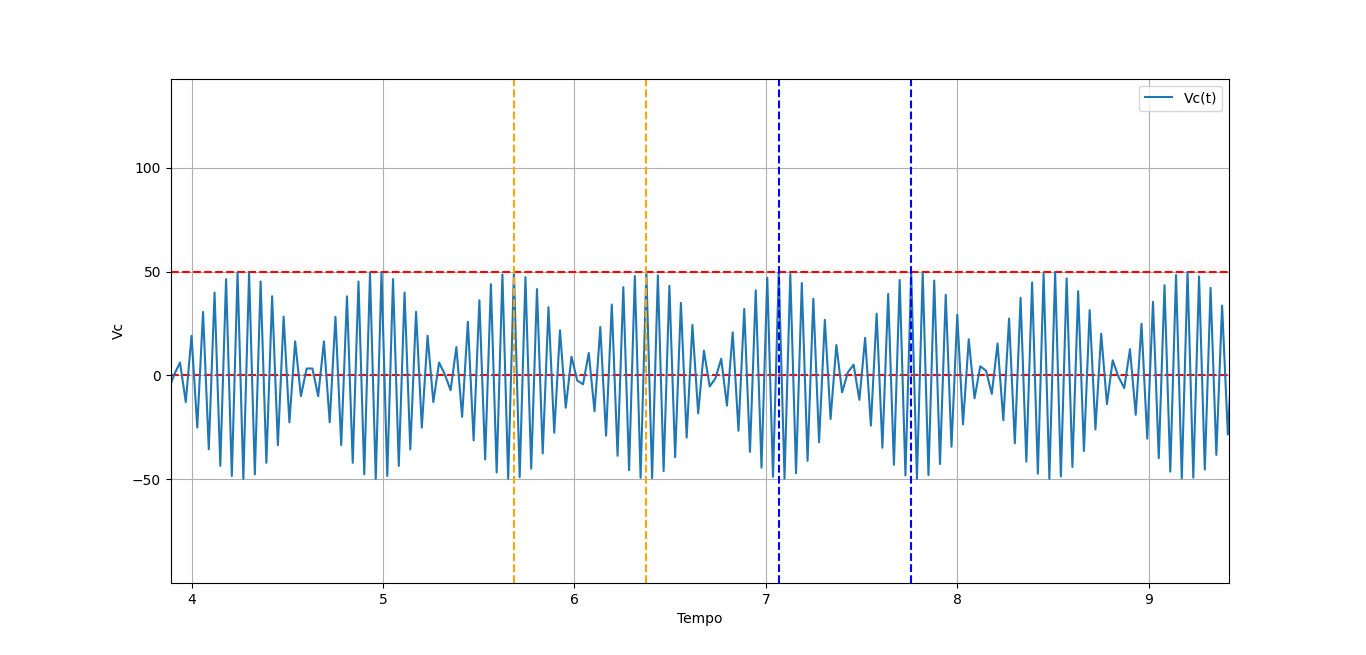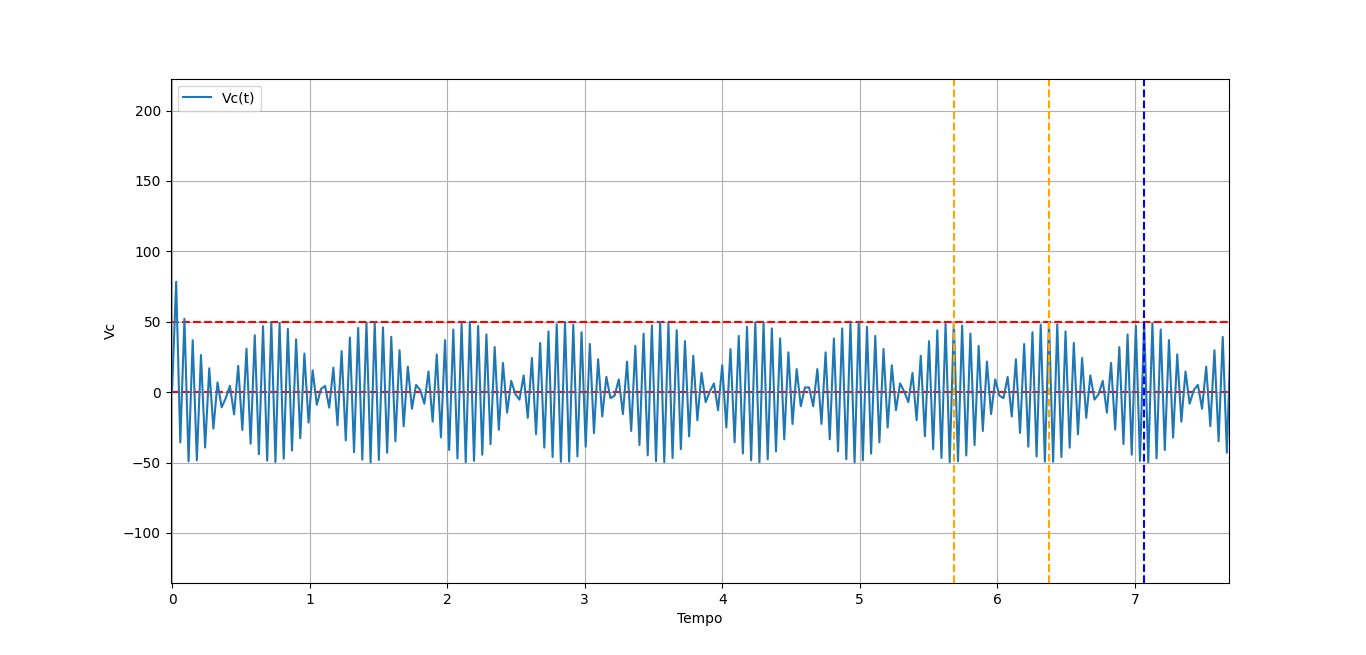

# Resultado encontrado:

#### Foram analisados os valores de x= 5,6843 e x= 6.3759 e constatou-se que se tratava do período estacionário (0.6916s). logo, para achar a frequencia do regime estacionário foi executado o inverso do período:
### f = 1/0.6915 Hz
### 1.4459 oscilações por segundo

# Tempo do Regime Transiente
### Conforme analise do gráfico, plotando linhas do ponto x=5.6843 menos o tempo do periodo, chegou-se ao valor aproximado de x=0.7s de tempo transcorrigo até que o regime estacionário se iniciasse. Vale destacar que os valores são aproximados dada a ausencia de uma biblioteca que realize esses calculos de forma intuitiva


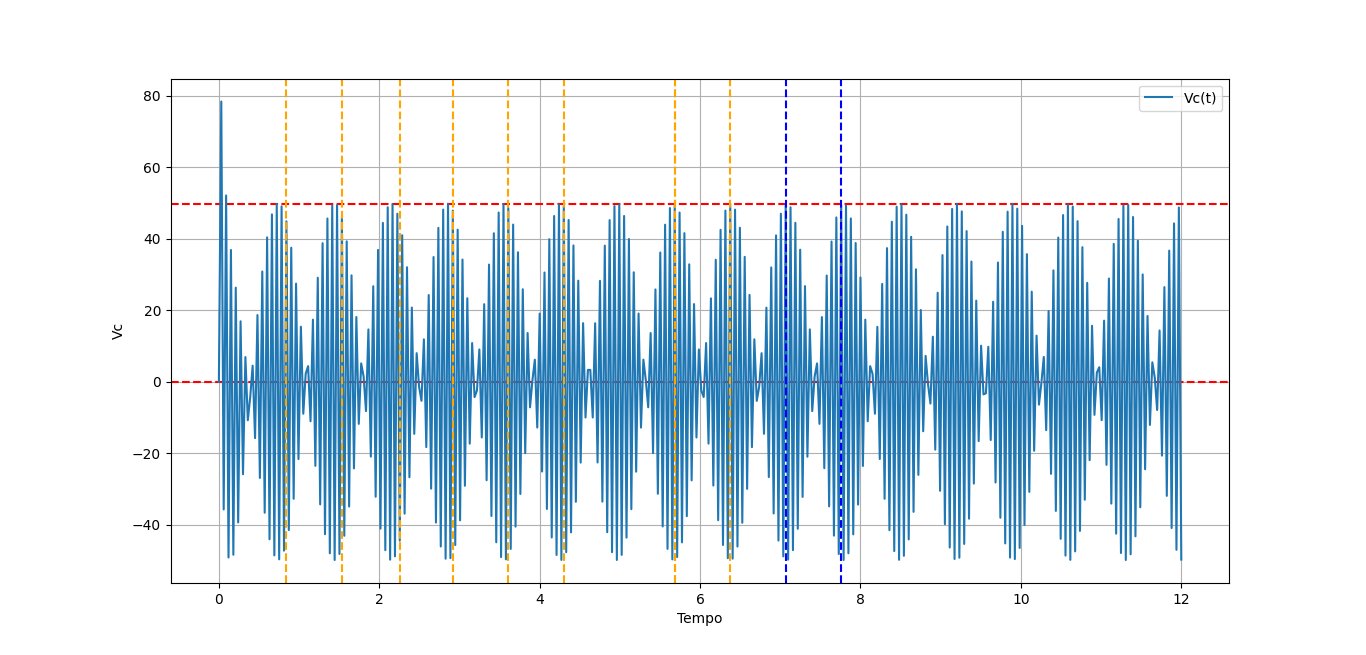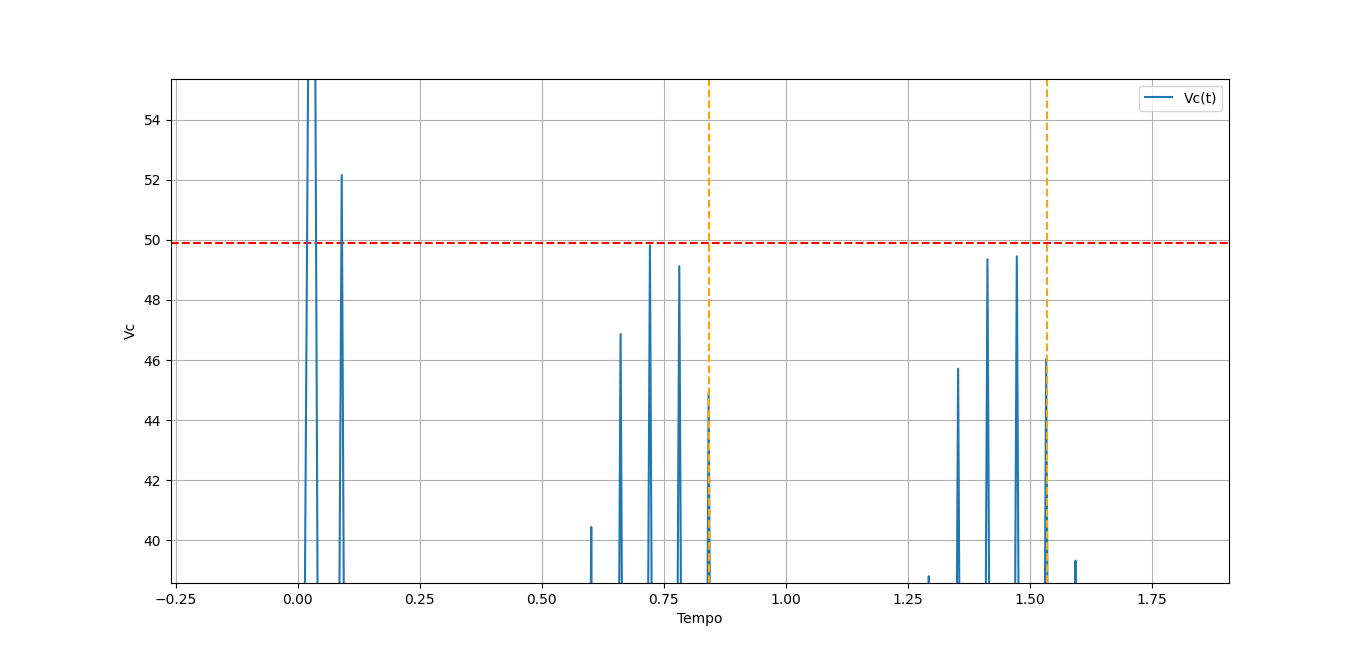